# Decima lezione di laboratorio

## Esercizio 1

In questo esercizio è stato utilizzato un codice che, tramite Simulated Annealing, aveva lo scopo di risolvere numericamente il problema del commesso viaggiatore.
La costruzione delle 32 città da visitare è stata identica a quella dell'esercizio della lezione precedente, sia nel caso di città distribuite uniformemente lungo una circonferenza, che nel caso di città distribuite uniformemente all'interno di un quadrato, in modo che i risultati dei due codici fossero comparabili.
In questo esercizio è stato però utilizzato l'algoritmo di Metropolis per esplorare lo spazio dei percorsi possibili, nella direzione del più breve possibile.

In particolare l'algoritmo di Metropolis era costituito come segue.

È stata costruita una temperatura fittizia del sistema, e interpretando la lunghezza dell'organismo come un'energia del sistema, si è lasciato equilibrare l'organismo alla temperatura scelta, abbassandola gradualmente, ottenendo infine il *ground state* del sistema, ovvero l'organismo di minima lunghezza.

Dato un organismo, la proposta di variazione di tale organismo è avvenuta utilizzando una delle 5 mutazioni costruite nell'esercizio della lezione precedente. La probabilità di accettazione del nuovo organismo proposto è stata calcolata come il rapporto tra il peso di Boltzmann della configurazione proposta e il peso di Boltzmann della configurazione precedente.

Ad ogni temperatura selezionata, l'organismo è stato lasciato evolvere per $10^5$ steps Monte Carlo, di cui $10^4$ sono stati salvati (1 ogni 10) per essere visualizzati.
La temperatura di partenza è stata scelta in modo tale che l'algoritmo di Metropolis avvesse un'accettanza di circa il $50\%$ alla sua partenza.

Di seguito è possibile vedere l'evoluzione della lunghezza del percorso in funzione del numero di steps Monte Carlo, e con relativo grafico dell'andamento della temperatura, nel caso di città distribuite uniformemente lungo una circonferenza. L'evoluzione è stata divisa in due fasi: una prima fase con $T \in [2.0, 0.6]$ e $\Delta T = 0.1$ e una seconda fase con $T \in [0.5, 0.02]$ e $\Delta T = 0.01$.

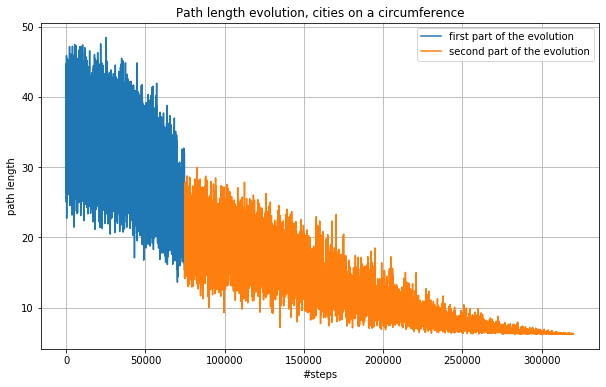

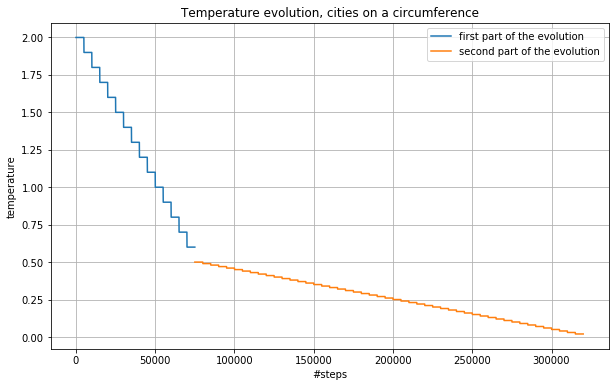

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

temperature1, length1 = np.loadtxt("metropolis_path_evolution_circumference1.dat", usecols=(0, 1), delimiter=' ', unpack='true')
steps1=np.zeros(length1.size)
for i in range(steps1.size):
    steps1[i]=i+1

temperature2, length2 = np.loadtxt("metropolis_path_evolution_circumference2.dat", usecols=(0, 1), delimiter=' ', unpack='true')
steps2=np.zeros(length2.size)
for i in range(steps2.size):
    steps2[i]=i+1+steps1[steps1.size-1]

plt.figure(figsize=(10, 6))
plt.plot(steps1, length1, label='first part of the evolution')
plt.plot(steps2, length2, label='second part of the evolution')
plt.title("Path length evolution, cities on a circumference")
plt.xlabel("#steps")
plt.ylabel("path length")
plt.grid(True)
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(steps1, temperature1, label='first part of the evolution')
plt.plot(steps2, temperature2, label='second part of the evolution')
plt.title("Temperature evolution, cities on a circumference")
plt.xlabel("#steps")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()

plt.show()

Di seguito è possibile vedere l'evoluzione della lunghezza del percorso in funzione del numero di steps Monte Carlo, e con relativo grafico dell'andamento della temperatura, nel caso di città distribuite uniformemente all'interno di un quadrato. L'evoluzione è stata divisa in tre fasi: una prima fase con $T \in [1.0, 0.2]$ e $\Delta T = 0.1$, una seconda fase con $T \in [0.2, 0.02]$ e $\Delta T = 0.01$ e una terza fase con $T \in [0.01, 0.001]$ e $\Delta T = 0.001$. La temperatura è stata abbassata ulteriormente rispetto al caso precedente per due ragioni: in primo luogo il percorso in questione era mediamente più breve, e in proporzione doveva esserlo anche la temperatura fittizia, e in secondo luogo, rispetto al caso precedente, vi è un maggior numero di percorsi di lunghezza simile candidati ad essere il percorso di lunghezza minima assoluta.

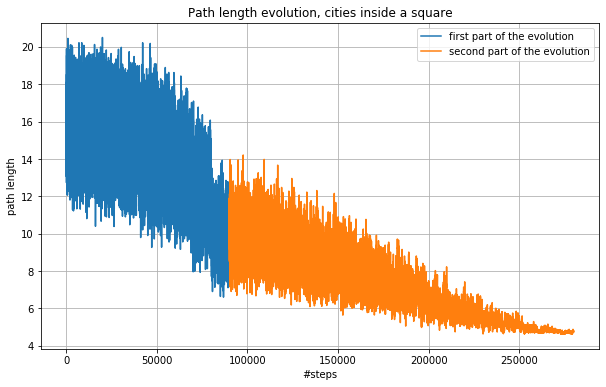

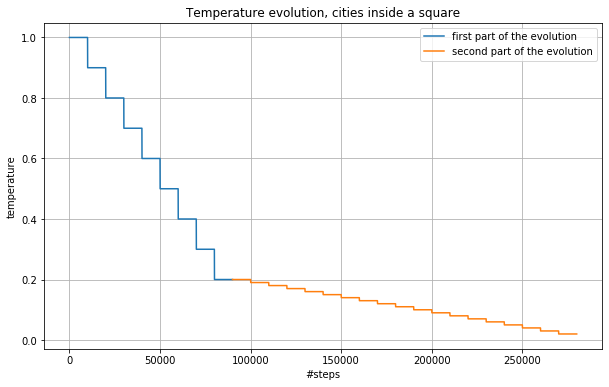

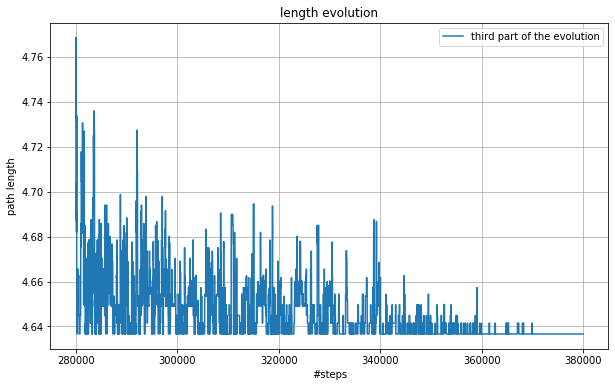

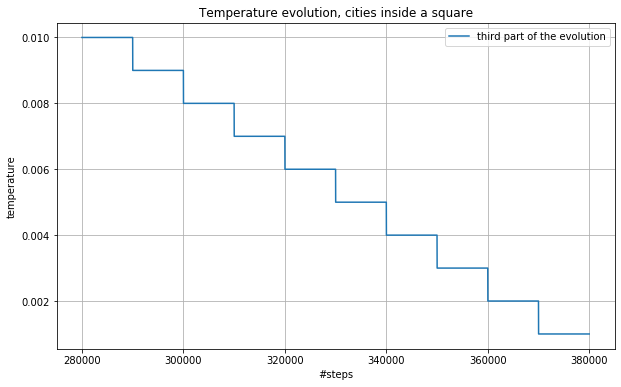

In [38]:
temperature1, length1 = np.loadtxt("metropolis_path_evolution_square1.dat", usecols=(0, 1), delimiter=' ', unpack='true')
steps1=np.zeros(length1.size)
for i in range(steps1.size):
    steps1[i]=i+1

temperature2, length2 = np.loadtxt("metropolis_path_evolution_square2.dat", usecols=(0, 1), delimiter=' ', unpack='true')
steps2=np.zeros(length2.size)
for i in range(steps2.size):
    steps2[i]=i+1+steps1[steps1.size-1]

temperature3, length3 = np.loadtxt("metropolis_path_evolution_square3.dat", usecols=(0, 1), delimiter=' ', unpack='true')
steps3=np.zeros(length3.size)
for i in range(steps3.size):
    steps3[i]=i+1+steps2[steps2.size-1]
    
plt.figure(figsize=(10,6))
plt.plot(steps1, length1, label='first part of the evolution')
plt.plot(steps2, length2, label='second part of the evolution')
plt.title("Path length evolution, cities inside a square")
plt.xlabel("#steps")
plt.ylabel("path length")
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(steps1, temperature1, label='first part of the evolution')
plt.plot(steps2, temperature2, label='second part of the evolution')
plt.title("Temperature evolution, cities inside a square")
plt.xlabel("#steps")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(steps3, length3, label='third part of the evolution')
plt.title("length evolution")
plt.xlabel("#steps")
plt.ylabel("path length")
plt.grid(True)
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(steps3, temperature3, label='third part of the evolution')
plt.title("Temperature evolution, cities inside a square")
plt.xlabel("#steps")
plt.ylabel("temperature")
plt.grid(True)
plt.legend()

plt.show()

Di seguito sono rappresentati i percorsi migliori finali ottenuti dal codice, nel caso della circonferenza e del quadrato. Dalle figure si evidenzia come siano identici a quelli ottenuti tramite l'algoritmo genetico dell'esercizio della lezione precedente.

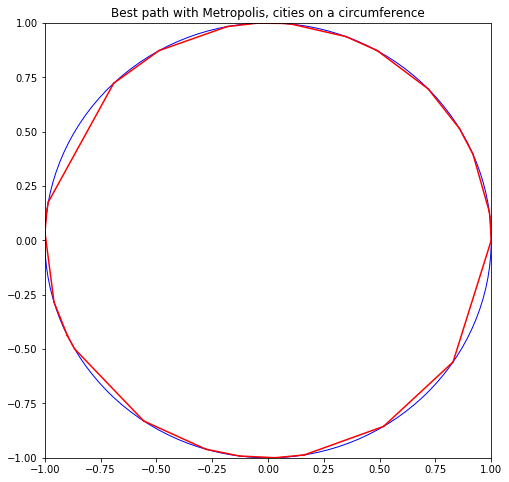

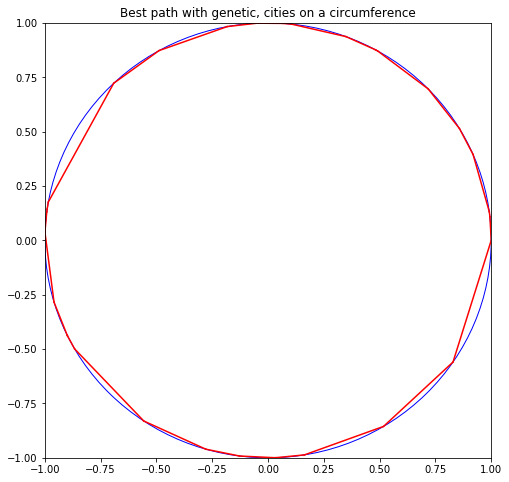

In [39]:
label1, x1, y1 = np.loadtxt("metropolis_best_path_circumference.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x1.size-1):
    plt.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='r')
plt.plot([x1[x1.size-1], x1[0]], [y1[y1.size-1], y1[0]], color='r')
circle=plt.Circle((0, 0), 1, color='b', fill=False)
ax = plt.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.add_artist(circle)
ax.set_title("Best path with Metropolis, cities on a circumference")

label1, x1, y1 = np.loadtxt("genetic_best_path_circumference.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x1.size-1):
    plt.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='r')
plt.plot([x1[x1.size-1], x1[0]], [y1[y1.size-1], y1[0]], color='r')
circle=plt.Circle((0, 0), 1, color='b', fill=False)
ax = plt.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.add_artist(circle)
ax.set_title("Best path with genetic, cities on a circumference")

plt.show()

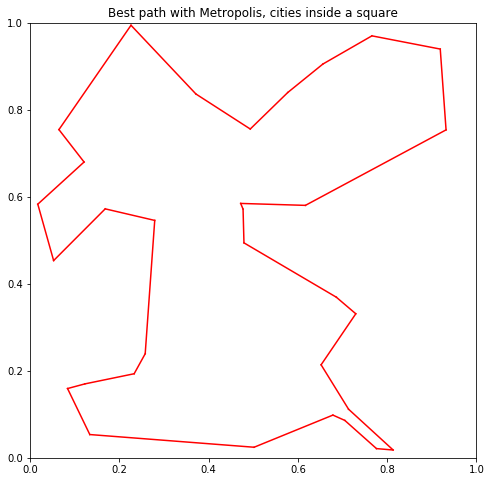

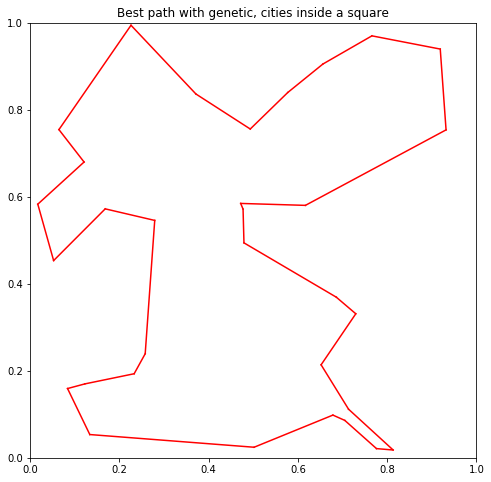

In [40]:
label2, x2, y2 = np.loadtxt("metropolis_best_path_square.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x2.size-1):
    plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='r')
plt.plot([x2[x2.size-1], x2[0]], [y2[y2.size-1], y2[0]], color='r')
ax=plt.gca()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_title("Best path with Metropolis, cities inside a square")

label2, x2, y2 = np.loadtxt("genetic_best_path_square.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x2.size-1):
    plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='r')
plt.plot([x2[x2.size-1], x2[0]], [y2[y2.size-1], y2[0]], color='r')
ax=plt.gca()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_title("Best path with genetic, cities inside a square")

plt.show()

## Esercizio 2

In questo esercizio è stato utilizzato lo stesso codice dell'esercizio della lezione precedente, con l'unica differenza che è modificato in modo da poter essere portato avanti da più processori (continenti) contemporaneamente in modo parallelo.

In particolare il numero di continenti utilizzati è stato $4$, e le città sono state costruite in modo che fossero uguali in ogni continente. Su ogni continente è stata costituite una popolazione di $100$ organismi, che è stata lasciata evolvere secondo l'algoritmo genetico della lezione precedente. L'unica differenza consiste nella presenza di una migrazione periodica del miglior organismo di ogni continente in un altro continente. Infatti si è scelto che ogni $50$ generazioni sia estratta una catena di migrazioni (esempio: $0 \rightarrow 3 \rightarrow 1 \rightarrow 2 \rightarrow 0$) secondo la quale vengano trasferiti i migliori organismi (dal continente $0$ al continente $3$, dal $3$ all'$1$, e così via...).

Il processo di convergenza dell'algoritmo dopo essere stato parallelizzato come sopra esposto è più rapido.
Nel caso del percorso migliore con città sulla circonferenza questo non è particolarmente evidente. Infatti l'algoritmo genetico semplice convergeva al percorso migliore sulla circonferenza dopo 280 generazioni, mentre con l'algoritmo parallelizzato ne occorrono 202. Nel caso invece del percorso migliore con città all'interno del quadrato la maggiore rapidità è più evidente, in quanto all'algoritmo genetico semplice occorrevano 2525 generazioni per convergere, mentre all'algoritmo parallelizzato ne occorrono 702. Di seguito sono riportate le evoluzioni del miglior organismo nel caso dell'algoritmo genetico non parallelizzato, e nel caso dell'algoritmo genetico parallelizzato sono riportate le evoluzioni del miglior organismo del continente 0.

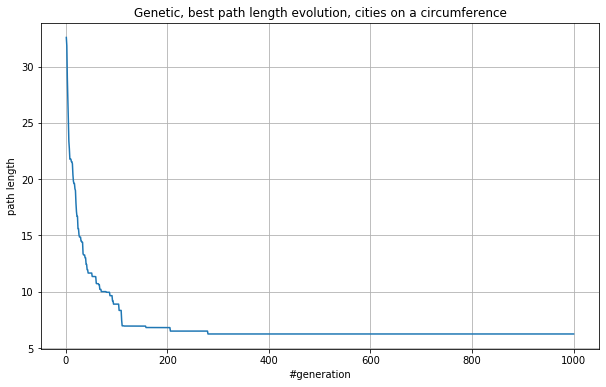

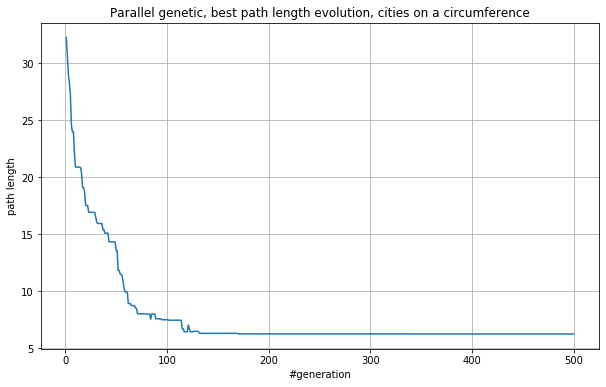

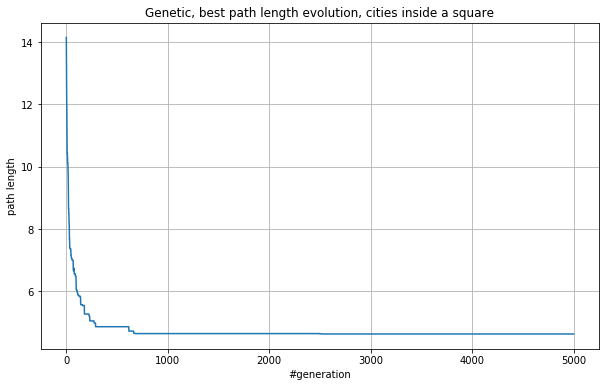

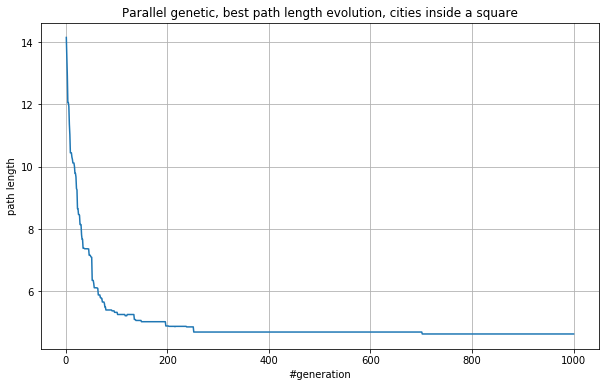

In [41]:
path1 = np.loadtxt("genetic_path_evolution_circumference.dat", usecols=(0), delimiter=' ', unpack='true')
generation1 = np.zeros(path1.size)
for i in range(generation1.size):
    generation1[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation1, path1)
plt.xlabel('#generation')
plt.ylabel('path length')
plt.title('Genetic, best path length evolution, cities on a circumference')
plt.grid(True)

path1 = np.loadtxt("parallel_genetic_path_evolution_circumference0.dat", usecols=(0), delimiter=' ', unpack='true')
generation1 = np.zeros(path1.size)
for i in range(generation1.size):
    generation1[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation1, path1)
plt.xlabel('#generation')
plt.ylabel('path length')
plt.title('Parallel genetic, best path length evolution, cities on a circumference')
plt.grid(True)

path2 = np.loadtxt("genetic_path_evolution_square.dat", usecols=(0), delimiter=' ', unpack='true')
generation2 = np.zeros(path2.size)
for i in range(generation2.size):
    generation2[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation2, path2)
plt.xlabel('#generation')
plt.ylabel('path length')
plt.title('Genetic, best path length evolution, cities inside a square')
plt.grid(True)

path2 = np.loadtxt("parallel_genetic_path_evolution_square0.dat", usecols=(0), delimiter=' ', unpack='true')
generation2 = np.zeros(path2.size)
for i in range(generation2.size):
    generation2[i]=i+1

plt.figure(figsize=(10, 6))
plt.plot(generation2, path2)
plt.xlabel('#generation')
plt.ylabel('path length')
plt.title('Parallel genetic, best path length evolution, cities inside a square')
plt.grid(True)

plt.show()

Di seguito sono riportati i percorsi migliori ai quali l'algoritmo genetico parallelizzato è giunto. Questi risultano essere identici a quelli trovati con l'algoritmo genetico semplice e a quelli trovati con l'algoritmo di Metropolis.

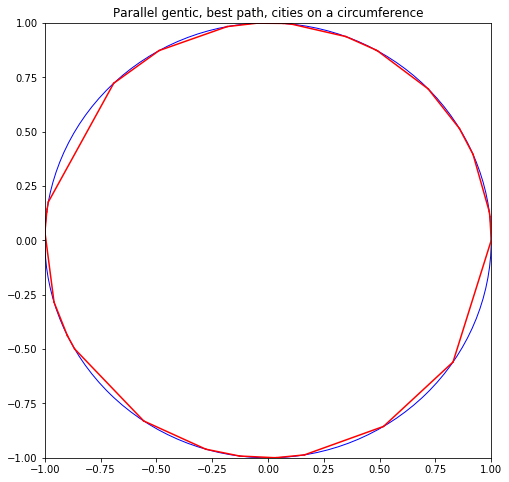

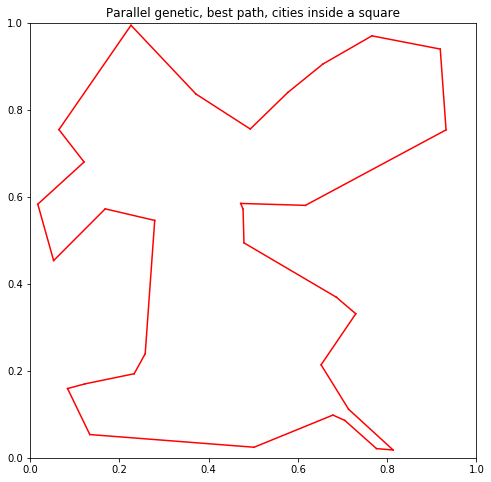

In [42]:
label1, x1, y1 = np.loadtxt("parallel_genetic_best_path_circumference0.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x1.size-1):
    plt.plot([x1[i], x1[i+1]], [y1[i], y1[i+1]], color='r')
plt.plot([x1[x1.size-1], x1[0]], [y1[y1.size-1], y1[0]], color='r')
circle=plt.Circle((0, 0), 1, color='b', fill=False)
ax = plt.gca()
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.add_artist(circle)
ax.set_title("Parallel gentic, best path, cities on a circumference")

label2, x2, y2 = np.loadtxt("parallel_genetic_best_path_square0.dat", usecols=(0, 1, 2), delimiter=' ', unpack='true')

plt.figure(figsize=(8, 8))
for i in range(x2.size-1):
    plt.plot([x2[i], x2[i+1]], [y2[i], y2[i+1]], color='r')
plt.plot([x2[x2.size-1], x2[0]], [y2[y2.size-1], y2[0]], color='r')
ax=plt.gca()
ax.set_xlim((0, 1))
ax.set_ylim((0, 1))
ax.set_title("Parallel genetic, best path, cities inside a square")

plt.show()